In [1]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.util import ngrams
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
DF = pd.read_csv("C:/Users/giulia macis/Desktop/UBISOFT/goodvideogames/youtube_comments_S8mbe6mF0js.csv")
DF

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=S8mbe6mF0js,Super Mario Bros. Wonder Review,2023-10-18T13:00:23Z,@GeorgeGabriel-c4s,"""Unravelling them into oblivion""😂",2024-11-08T12:27:42Z,0,0
1,https://www.youtube.com/watch?v=S8mbe6mF0js,Super Mario Bros. Wonder Review,2023-10-18T13:00:23Z,@judobullfrogg,"I haven't played a mario game in years, so i l...",2024-10-27T21:16:11Z,0,0
2,https://www.youtube.com/watch?v=S8mbe6mF0js,Super Mario Bros. Wonder Review,2023-10-18T13:00:23Z,@Nintendofan80,I give it a 10 it is awesome video game love it .,2024-10-15T17:52:54Z,0,0
3,https://www.youtube.com/watch?v=S8mbe6mF0js,Super Mario Bros. Wonder Review,2023-10-18T13:00:23Z,@BenetTribble,Playing this with my kids takes me back to pla...,2024-10-06T11:57:52Z,0,0
4,https://www.youtube.com/watch?v=S8mbe6mF0js,Super Mario Bros. Wonder Review,2023-10-18T13:00:23Z,@celestinelocsin,still in wolrd 2,2024-08-06T02:40:34Z,0,1
...,...,...,...,...,...,...,...,...
1059,https://www.youtube.com/watch?v=S8mbe6mF0js,Super Mario Bros. Wonder Review,2023-10-18T13:00:23Z,@ZER0lPT,Beaten it already.\nBest 2D Mario and maybe th...,2023-10-18T13:01:21Z,2,23
1060,https://www.youtube.com/watch?v=S8mbe6mF0js,Super Mario Bros. Wonder Review,2023-10-18T13:00:23Z,@Duma86,First,2023-10-18T13:01:13Z,0,1
1061,https://www.youtube.com/watch?v=S8mbe6mF0js,Super Mario Bros. Wonder Review,2023-10-18T13:00:23Z,@Memelord2020,9/10,2023-10-18T13:01:10Z,0,9
1062,https://www.youtube.com/watch?v=S8mbe6mF0js,Super Mario Bros. Wonder Review,2023-10-18T13:00:23Z,@kingshadow8782,Hello there!,2023-10-18T13:01:02Z,1,1


In [3]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update([
    'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','review'
])
new_stopwords = set(stopwords.words('english'))
new_stopwords.update([
    'good', 'like', 'concord', 'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score',"game", 
    "mario", "bros", "wonder", "review", "still", "kids", "back", "give", 
    "awesome", "game", "video", "love", "played", "playing", "world", "years",
    "little","something","spider","better","everyone","guy","wait","look","gave","man","another"

])
lmtzr = WordNetLemmatizer()

In [4]:
# Define reusable functions

def preprocess_text(text):
    """Preprocess text by lowercasing, removing punctuation, tokenizing, and filtering stopwords."""
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower().translate(str.maketrans('', '', string.punctuation)))
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) >= 3]
    return ' '.join(tokens)

def get_sentiment(text):
    """Classify sentiment of text as positive, negative, or neutral."""
    score = analyzer.polarity_scores(text)
    negative_words = ["suck", "sucks", "done", "worst", "hate", "disappointed", "disgusted","shit","dog shit", ]
    if any(word in text.lower() for word in negative_words):
        return 'negative'
    elif score['compound'] >= 0.01:
        return 'positive'
    elif score['compound'] <= -0.01:
        return 'negative'
    else:
        return 'neutral'

def text_processing(texts):
    """Further clean and tokenize text for topic modeling."""
    texts = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    texts = [[word for word in text.lower().split()] for text in texts]
    texts = [[lmtzr.lemmatize(word) for word in text if word not in new_stopwords and len(word) >= 3] for text in texts]
    return texts

def bigram_analysis(comments, top_n=30):
    """Generate bigrams from tokenized comments and plot the frequency distribution."""
    all_tokens = [word_tokenize(comment) for comment in comments]
    all_ngrams = [ngram for tokens in all_tokens for ngram in ngrams(tokens, 2)]
    freq_dist_ngrams = FreqDist(all_ngrams)
    
    # Convert to DataFrame and sort
    df_ngrams = pd.DataFrame(list(freq_dist_ngrams.items()), columns=['n-gram', 'frequency'])
    df_ngrams = df_ngrams.sort_values(by='frequency', ascending=False)
    
    # Plot top n bigrams
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_ngrams['n-gram'][:top_n].apply(lambda x: ' '.join(x)),  
        df_ngrams['frequency'][:top_n]
    )
    plt.title(f'Top {top_n} Bigram Frequency Distribution')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
    
    return df_ngrams


In [5]:
# Convert to datetime and extract only the date part
DF['releaseDate'] = pd.to_datetime(DF['releaseDate'].astype(str).str.replace('Z', '')).dt.date
DF['publishedTimeText'] = pd.to_datetime(DF['publishedTimeText'].astype(str).str.replace('Z', '')).dt.date

# Define the one-week period after the release date
release_date = DF['releaseDate'][0]
one_week_after_release = release_date + pd.DateOffset(weeks=1)
one_week_after_release = one_week_after_release.date()  # Convert to date format

# Filter for comments within the first week after the release date
df = DF[(DF['publishedTimeText'] >= release_date) & (DF['publishedTimeText'] <= one_week_after_release)]

# Select relevant columns and preprocess comments
df = df[['publishedTimeText', 'comment']]
df['processed_comments'] = df['comment'].apply(preprocess_text)

# Display the filtered DataFrame
df


,publishedTimeText,comment,processed_comments
144,2023-10-25,2d game gets a 9 wtf and spiderman 2 gets an 8...,game get wtf spiderman get graphic 100 better
145,2023-10-25,Super Mario is the most iconic character in vi...,super mario iconic character game history
146,2023-10-25,Super Mario bros = the Michael Jackson of vide...,super mario bros michael jackson game sonic he...
147,2023-10-25,"This game was such wasted potential , mario de...",game wasted potential mario deluxe better whoe...
148,2023-10-25,Deserves 10❤,deserves 10❤
...,...,...,...
1059,2023-10-18,Beaten it already.\nBest 2D Mario and maybe th...,beaten already best mario maybe best platforme...
1060,2023-10-18,First,first
1061,2023-10-18,9/10,910
1062,2023-10-18,Hello there!,hello


In [6]:
# Randomly sample 500 rows with a fixed random_state for reproducibility
df = df.sample(n=500, random_state=2).reset_index(drop=True)  # Use any integer as the random_state

In [7]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['processed_comments'].apply(get_sentiment)
most_common_sentiment = df['sentiment'].value_counts().idxmax()
print(f'The video has mostly {most_common_sentiment} comments.')
df

The video has mostly positive comments.


,publishedTimeText,comment,processed_comments,sentiment
0,2023-10-19,Would you say this feels/plays totally differe...,would say feelsplays totally different previou...,positive
1,2023-10-19,It has a little something for everybody,little something everybody,neutral
2,2023-10-18,Mario on acid,mario acid,neutral
3,2023-10-21,"2:44 ironically, paper mario games always have...",244 ironically paper mario game story,neutral
4,2023-10-18,"Mario galaxy 3 plz, thx",mario galaxy plz thx,positive
...,...,...,...,...
495,2023-10-19,Nintendo always proves that beautiful art styl...,nintendo prof beautiful art style passion impo...,positive
496,2023-10-24,Can't wait to play this on the next 3 Nintendo...,wait next nintendo console,neutral
497,2023-10-20,the real question is\ndoes it have a little so...,real question little something everyone,neutral
498,2023-10-19,🎃,,neutral


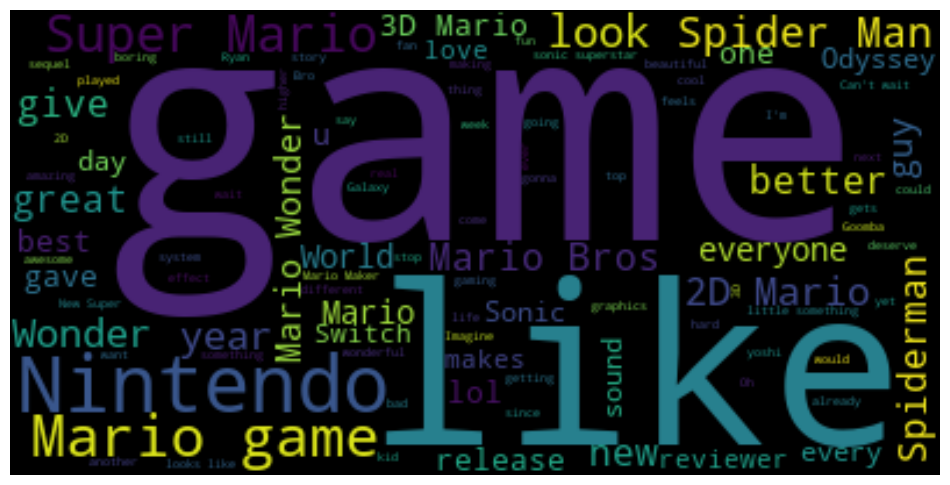

In [8]:
# WordCloud Visualization
word_cloud_text = ' '.join(df['comment'].dropna())
wordcloud = WordCloud(max_words=100, stopwords=custom_stopwords, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

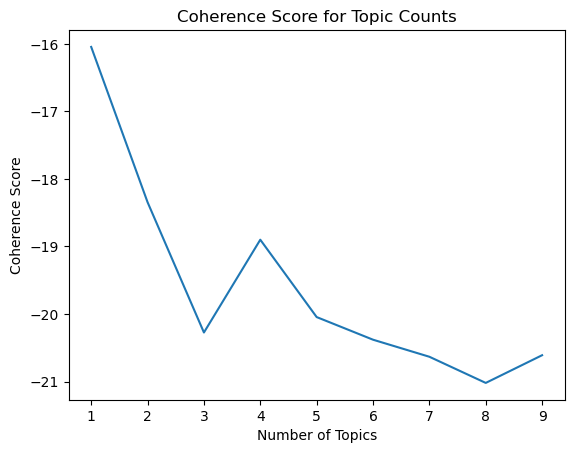

In [9]:
# Topic Modeling
data = text_processing(df['processed_comments'].values.tolist())
dictionary = Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Coherence Analysis for Topic Modeling
np.random.seed(1)
k_range = range(1, 10)
scores = []
for k in k_range:
    lda_model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=k, passes=20)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Topic Counts")
plt.show()


In [10]:
# Final LDA Model with Optimal Number of Topics
optimal_k = 4
model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=optimal_k, passes=20)
print(model.show_topics())

[(0, '0.010*"year" + 0.008*"release" + 0.007*"higher" + 0.006*"lol" + 0.006*"deserves" + 0.006*"going" + 0.006*"gaming" + 0.005*"nintendo" + 0.005*"next" + 0.005*"joke"'), (1, '0.041*"spiderman" + 0.007*"bad" + 0.006*"day" + 0.005*"flower" + 0.005*"confirmed" + 0.005*"top" + 0.004*"story" + 0.004*"odyssey" + 0.004*"fun" + 0.004*"different"'), (2, '0.016*"super" + 0.007*"nintendo" + 0.006*"wonderful" + 0.006*"fun" + 0.005*"goombah" + 0.004*"maker" + 0.004*"new" + 0.004*"thanks" + 0.004*"easy" + 0.004*"disappoints"'), (3, '0.011*"sonic" + 0.010*"great" + 0.009*"amazing" + 0.009*"nintendo" + 0.009*"superstar" + 0.006*"kid" + 0.005*"already" + 0.005*"acid" + 0.005*"super" + 0.004*"best"')]


The coherence score does not significantly improve beyond 4 topics, which suggests that adding more topics might not enhance interpretability.

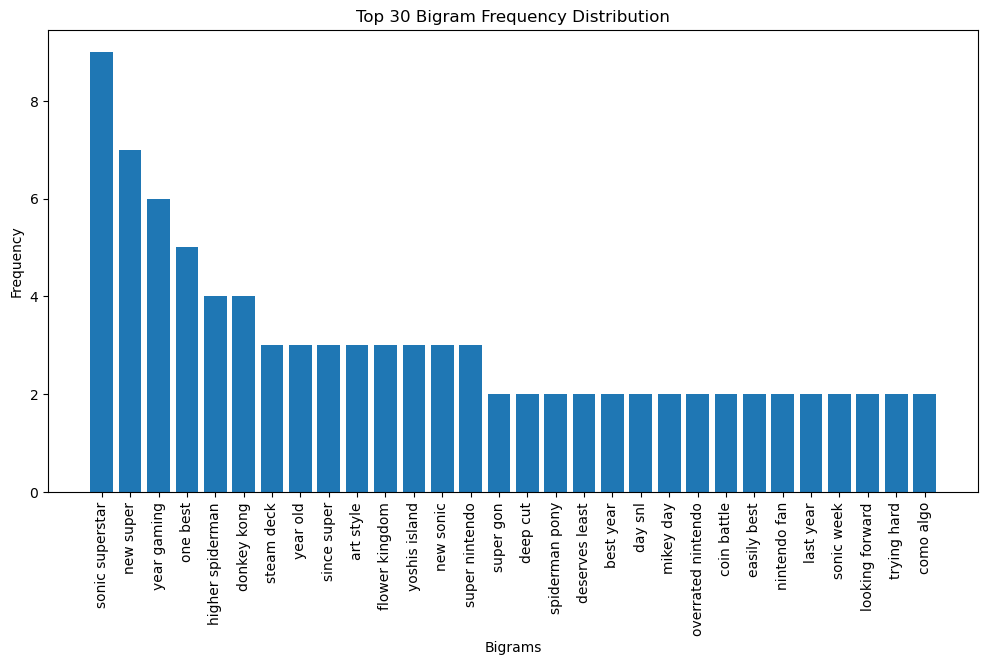

In [12]:
data_as_strings = [' '.join(tokens) for tokens in data]
df_ngrams = bigram_analysis(data_as_strings)

In [27]:
#Load the existing df_topics CSV file
#title=DF['title'].unique()
#file_path = r'C:/Users/giulia macis/Desktop/UBISOFT/df_good_topics.csv'
#df_good_topics = pd.read_csv(file_path)
#Append the new row to the DataFrame
#new_row = pd.DataFrame({'title': title, 'num_topics': optimal_k})
#df_good_topics = pd.concat([df_good_topics, new_row], ignore_index=True)
# Save the updated DataFrame back to the CSV file
#df_good_topics.to_csv(file_path, index=False)
#df_good_topics

,title,num_topics
0,GTA 5 - Review,3
1,Space Marine 2 - Before You Buy,5
2,Alan Wake 2 - Before You Buy,4
3,PlayerUnknown's Battlegrounds (PS4) - Before Y...,4
4,Apex Legends - Before You Buy,2
5,PlayerUnknown's Battlegrounds (PS4) - Before Y...,4
6,Uncharted 4: A Thief's End Review,4
7,Super Mario Bros. Wonder Review,4
